# Trabalhando com um dataset famoso no scikit-learn

Iremos usar novamente o scikit-learn. Abaixo segue algumas vantagens e desvantagens dessa biblioteca:

* Vantagens:
    * Interface consistente com ótima documentação;
    * Muitas funções e módulos disponíveis para engenharia de atributos, validação de modelo e etc;
    * comunidade ativa para desenvolvimento e suport;
    * possui ferramentas para otimização dos modelos como tuning de hiperparâmetros
* Desvantagens:
    * Pouca ênfase na interpretação das relações existentes nos dados;
    * Tem uma dificuldade inicial para começar maior do que ferramentas como o R ou Weka.
    
Artigo sobre a filosofia da biblioteca e funcionalidades principais:
<br>
Pedregosa, Fabian, et al. **"Scikit-learn: Machine learning in Python."** Journal of machine learning research 12.Oct (2011): 2825-2830.

<br>
Site oficial:
http://scikit-learn.org/stable/index.html


## <font color=red>Créditos: </font>

Esta aula foi baseado nos materias disponibilizados por Just Markham.
<br>
link: https://github.com/justmarkham/scikit-learn-videos

In [2]:
#comando para habilitar o autocomplete:
%config IPCompleter.greedy=True

In [75]:
from IPython.display import display, HTML
#HTML('<iframe src=http://scikit-learn.org/stable/index.html width=1000 height=350></iframe>')
HTML('<iframe src=http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html width=1000 height=350></iframe>')

## Acessando a documentação das funções

In [4]:
from sklearn import datasets
datasets?

## Introdução ao iris dataset

Link: http://archive.ics.uci.edu/ml/datasets/Iris

O dataset tem 50 amostras (instâncias) de 3 diferentes espécies de iris (150 amostras no total). O objetivo é classificar o espécie da iris ['setosa' 'versicolor' 'virginica'].
* Atributos utilizados:
    * sepal length
    * sepal width
    * petal length
    * petal width

<img src="figure/iris.png"/>

## Carregando o iris dataset

* O sklearn possui um pacote com alguns famosos datasets que podem ser usados como benchmark. 
* No iris dataset, a função que gera o dataset retorna um dicionário com dois itens:
    * um array $n\_samples*n\_features$, cuja chave é **data**.
    * um array de tamanho $n\_samples$ contendo as classes, cuja chave é ** target **.

<br>
* É comum utilizarmos a tupla $(X, y)$ para representar os atributos e classes, 
    * onde $X$ é um array $n\_samples*n\_features$ e $y$ é um array de tamanho $n\_samples$ contendo as classes.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

## Imprimindo as 5 últimas instâncias

Observe que cada linha representa uma flor e cada coluna representa os 4 atributos apresentados anteriormente.

In [6]:
iris.data[-5:]

array([[ 6.7,  3. ,  5.2,  2.3],
       [ 6.3,  2.5,  5. ,  1.9],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 6.2,  3.4,  5.4,  2.3],
       [ 5.9,  3. ,  5.1,  1.8]])

## Imprimindo as classes das 5 últimas instâncias

A seguir vemos que todas as flores apresentadas na matriz anterior pertencem a classe 2.

In [7]:
iris.target[-5:]

array([2, 2, 2, 2, 2])

## Represetação das classes

Note que o valor de target $2$ representa a classe 'virginica'.

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

## Shape dos Atributos e classes

* Observe que as classes e os atributos são objetos distintos, mas com o mesmo número de colunas. 
    * Isso é um requerimento para lidarmos com algoritmos de aprendizagem de máquina. 
* Note que para cada linha do array de atributos precisamos de uma resposta (classe) para a pergunta: qual a espécie desta flor?
* Para melhor entendimento, apresenteramoes os shapes dos arrays:

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target.shape

(150,)

In [11]:
X = iris.data
y = iris.target

# K-nearest neighbors (KNN) - classificação

Ideia geral do algoritmo:

* Pega um valor k;
* Procura as k instâncias nos dados de treinamento que são mais próximas de uma dada instância cuja classe não é conhecida;
* Use a classe mais popular das k instâncias mais próximas para como a classe prevista da instância cuja classe não era conhecida.

### Exemplo de dados de treinamento:

<img src="figure/train_data_knn.png" \>

Após o treinamento são criadas superfícies de decisão (cores em background). Nesse caso, temos o **k=1**.

<img src="figure/train_data_knn_k-1.png" \>

Treinamento com **k=5**.

<img src="figure/train_data_knn_k-5.png" \>

obs.: as áreas brancas são os locais onde houve empate.

## Treinamento do modelo

* O modelo knn irá aprender o relacionamento entre $X$ e $y$.
* Nesse momento podem ser especificados parâmetros (também conhecidos como hiperparâmetros) para ajustar o modelo aos dados. 
    * Caso não sejam especificados, o modelo utilizará os valores padrão.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Treinando e testando com a mesma base de dados

In [13]:
knn.fit(X,y)
y_pred = knn.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Avaliando o modelo

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

1.0

### KNN com k=5

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
y_pred = knn.predict(X)
accuracy_score(y, y_pred)

0.96666666666666667

### Exercício

Utilizando o dataset iris, qual o melhor valor de k para o algorimto KNN?

## Overfitting  e Underfitting

* Treinar e testar com a mesma base de dados não é uma boa estratégia. 
* Em aprendizagem de máquina, o objetivo é que os modelos preditivos consigam generalizar os padrões que aprenderam no treinomento em dados que eles ainda não viram. 
    * Assim, a interseção entre a base de treino e teste deve ser vazia.
    * Dessa forma, maximizar a acurácia no treino pode significar a construção de um modelo complexo que não necessariamente generalize bem.

<br>
**Exemplo:**

<img src="figure/overfitting.png" \>

* Na Figura, o eixo x e y representam dois atributos e as cores vermelho e azul representam duas classes. 
* A **superfície de decisão** verde é uma hipótese que está superajustada (overfit) aos dados de treino (aprende ruídos), enquanto que a **superfície de decisão** preta detecta o padrão (sinal) nos dados.

<br>
**Dilema Viés-Variância**
* O erro de predição pode ser decomposto em **viés e variância** (Bias and Variance Tradeoff). 
* No caso do KNN, quanto menor o valor de k, maior a variância e menor o viés. 
* Quanto maior o valor de k, menor a variância e maior o viés. 
* Observe que o segredo está em encontrar o um equilíbrio entre o viés e a variância, a fim de combater o overfittig.

<br>
**Segue algumas dicas para lidar com o viés e variância:**

* Combata os seus instintos
    * Em geral, temos a tendência de achar que devemos minimizar o viés, mesmo ao custo de aumentar a variância, construindo modelos extramente complexos que não generalizam bem com dados novos.
* Bagging and Resampling
* Melhorar a amostra (base de dados)
<br>
<br>
Por fim, se a complexidade do seu modelo ultrapassar um limear de equilíbrio (optimal model complexity), então haverá um overfitting. Entretanto, se modelo tender ao superficial (complexidade abaixo do optimal model complexity), então haverá um underfitting. A Figura abaixo ilustra como a análise de viés e variância pode contribuir para o erro de predição e, consequentemente, para o overfitting e underfitting.

<img src="figure/biasvariance.png" \>

<br>

Para uma maior compreensão sobre overfitting, sugiro as seguintes fontes de estudo:
* [Estimando o erro de predição](https://www.youtube.com/watch?v=_2ij6eaaSl0&t=2m34s)
* [Bias and Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
* Domingos, Pedro. **"A few useful things to know about machine learning."** Communications of the ACM 55.10 (2012): 78-87.

## Treinando e testando dados diferentes

* A função $train\_test\_split$ divide a base de dados em duas partes;
* O parâmetro $test\_size$ indica o percentual dos dados que será utilizado para teste.
    * O restante é utilizado para treino. 
* O parâmetro random_state é a semente para a seleção aleatória das instâncias que irão compor a base de treino e teste.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

* A Figura abaixo mostra um base de dados com 5 instâncias, 2 atributos e na última coluna a classe. 
* Nesse caso, 40% dos dados foram selecionados aleatoriamente para teste e 60% para treinamento.

<img src="figure/train_test_split.png"/>

In [53]:
# shapes dos novos X
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [54]:
# shapes dos novos y
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [59]:
def treino_test_knn(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)
    #print('KNN com k=%d obteve acurácia igual a %.2f' % (k, accuracy_score(y_test, y_pred)))

acc = treino_test_knn(1)
print('KNN com k=1 obteve acurácia igual a %.2f' % (acc))
acc = treino_test_knn(5)
print('KNN com k=5 obteve acurácia igual a %.2f' % (acc))

KNN com k=1 obteve acurácia igual a 0.95
KNN com k=5 obteve acurácia igual a 0.97


### Será que podemos achar um valor melhor para $k$ ?

Vamos testar o k indo de 1 até 30.

In [60]:
k_range = list(range(1,31))
acuracias = []
for k in k_range:
    acc = treino_test_knn(k)
    acuracias.append(acc)

Agora vamos plotar o relacionamento entre o valor de $k$ e acurácia do modelo.

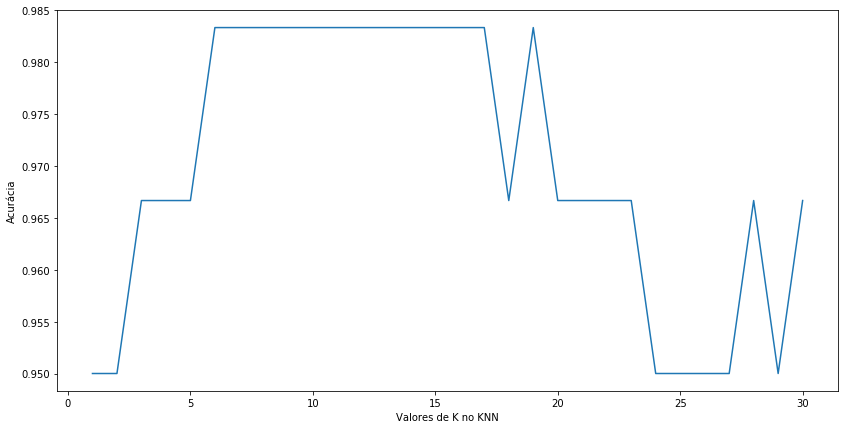

In [74]:
import matplotlib.pyplot as plt

#permite os gráficos aparecerem no notebook
%matplotlib inline

plt.figure(figsize=(14,7))
plt.plot(k_range, acuracias)
plt.xlabel('Valores de K no KNN')
plt.ylabel('Acurácia')

## Pontos negativos e positivos do $train\_test\_split$

* (Negativo) Pode acontecer uma alta variação na acurácia de estimativas de dados que não estão na base de dados;
    * K-fold cross-validation é uma boa alternativa para este problema
* (Negativo) Base de dados desbalanceada;
* (Positivo) Rápidez e flexibilidade;

## Validação cruzada (k-fold cross-validation)

Funciona da seguinte forma:

1. Dividir o dataset em k partições (folds) com o mesmo tamanho;
2. Usar a primeira partição como teste e a união das demais como treino;
3. Calcular a acurácia no teste;
4. Repetir os passos 2 e 3 k vezes, usando cada uma das k partições para teste;
5. Calcular a média das acurácias obtidas nos k testes;

A Figura abaixo mostra a validação cruzada para 5 partições (folds):

<img src="figure/cross_validation_diagram.png" \>

In [85]:
from sklearn.model_selection import KFold

#simulação de divisão de uma sequencia de 0..24 em 5 partições. Note que não embaralhamos os dados.
kf = KFold(n_splits=5, shuffle=False)
kf = kf.split(range(25))

print('{} {:^61} {:^27}'.format('Iteração', 'Dados de Treinamento', 'Dados de Teste'))

for i, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(i, data[0], str(data[1])))

Iteração                     Dados de Treinamento                            Dados de Teste       
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


* Note que para cada iteração as instâncias estavam ou na base de treino ou na base de teste.
* Cada instância aparece na base de teste exatamente uma vez;

### Pontos positivos da validação cruzada

* Mais adequado para estimar amostras novas;
* Modo mais eficiente de usar os dados, uma vez que cada instância é usada no treino e no teste;

### Recomendações para validação cruzada

1. O $k$ pode ser qualquer valor, mas geralmente é utilizado $k=10$;
2. Para problemas de classificação, recomenda-se a amostragem estratificada para a criação das partições.
    * Cada classe é atribuída às partições em proporções iguais, a fim de evitar desbalanceamento nas partições;
    * a função *cross_val_scole* do sklearn faz isso por padrão;

### Exemplo de uso da validação cruzada

In [91]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  1.        ,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [99]:
#acurácia média e o desvio padrão
print('Acurácia = %.2f [+/- %.2f]' % (scores.mean(),scores.std()))

Acurácia = 0.98 [+/- 0.03]


## <font color=red> Exercício em Sala </font>

1. Experimente navegar pela API do scikit-learn e realizar o treinamento e teste com uma novo algoritmo de classificação. O resultado foi melhor ou pior? A diferença é estatisticamente significativa?

## Melhorias para a validação cruzada:

**Executar a validação cruzada várias vezes**
* Repetir a validação cruzada vérias vezes (com divisões aleatórias nos dados) e calcular a média dos resultados aumenta o nível de confiança.
* Isso pode gerar uma estimativa mais confiável em relação à dados que novos, pois reduz-se a veriância associada a uma única execução da validação cruzada;

**Separar um parte dos dados**

* Separe uma parte dos dados antes de começar o processo de construção do modelo preditivo;
* Encontre o melhor modelo usando validação cruzada nos dados remanescentes e teste este modelo usando os dados separados na etapa anterior;
* Neste caso temos uma validação mais confiável, uma vez que verdadeiramente o teste foi realizado com dados ainda não visto pelo modelo;

** Engenharia de atributos nas iterações da validação cruzada **

* Normalmente, a engenharia de atributos acontece antes da validação cruzada;
* Ao invés disso, realize a engenharia de atributos durante as interações da validação cruzada;
* Estimativa mais confiável com dados novos, uma vez que esse procedimento irá simular mais apropriadamente o momento em que o modelo irá ser testado com dados novos;

## Materiais para estudo:

* documentação do scikit-learn: [Validação Cruzada](http://scikit-learn.org/stable/modules/cross_validation.html), [Seleção de Modelo](http://scikit-learn.org/stable/modules/model_evaluation.html)
* Seção 5.1 do livro [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) e os vídeos relacionados: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY&list=PL5-da3qGB5IA6E6ZNXu7dp89_uv8yocmf), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0&list=PL5-da3qGB5IA6E6ZNXu7dp89_uv8yocmf);
* Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)